## Machine Learning to detect Fraud

Here we will be using Machine Learning Techniques to detect Fraud. We will be using: 


#### Supervised Techniques:
1. Logistic Regression
2. Classification Trees
3. Naive Bayes Classifier 


#### Unsupervised Techniques:
1. Local Outlier Factor (LOF)
2. Isolation Forest Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Self.Study/Projects/Credit Card fraud detection/Data/creditcard.csv')

In [ ]:
#df = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [7]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [8]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.

In [9]:
class_names = {0: 'Not Fraud', 1: 'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


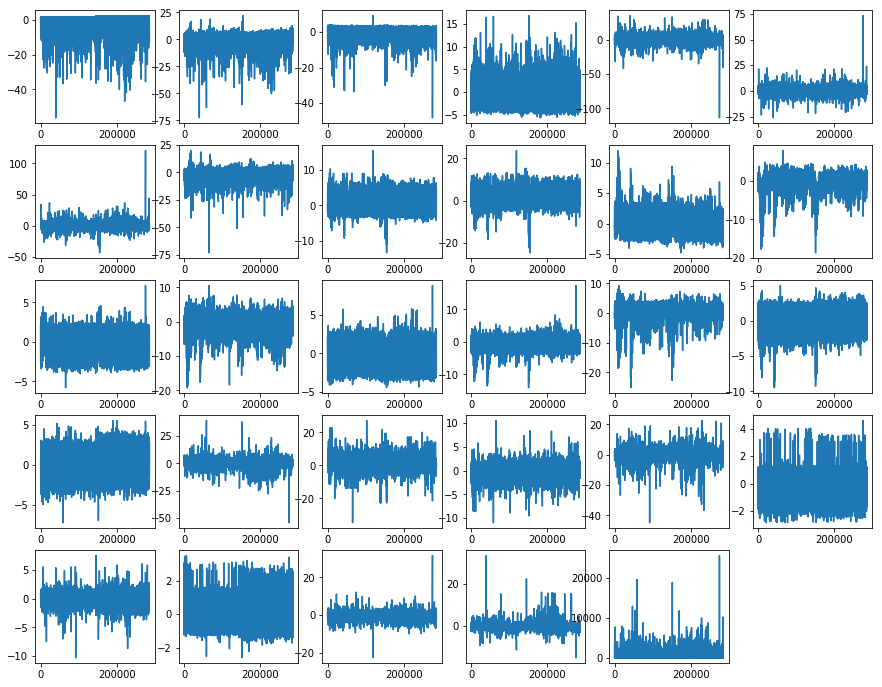

In [10]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

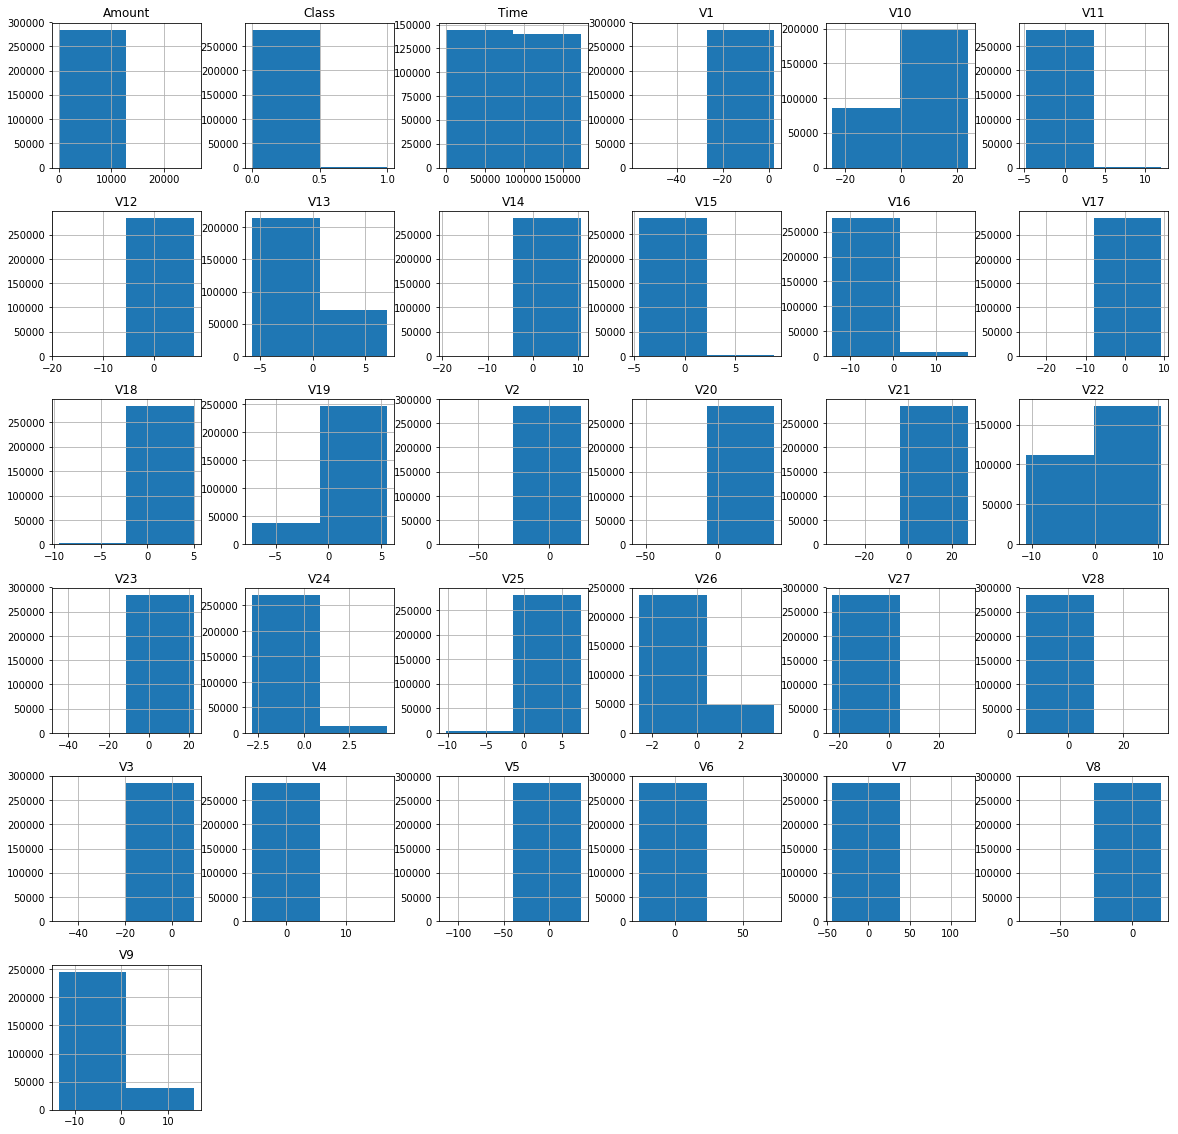

In [12]:
df.hist(figsize = (20, 20), bins = 2)
plt.show()

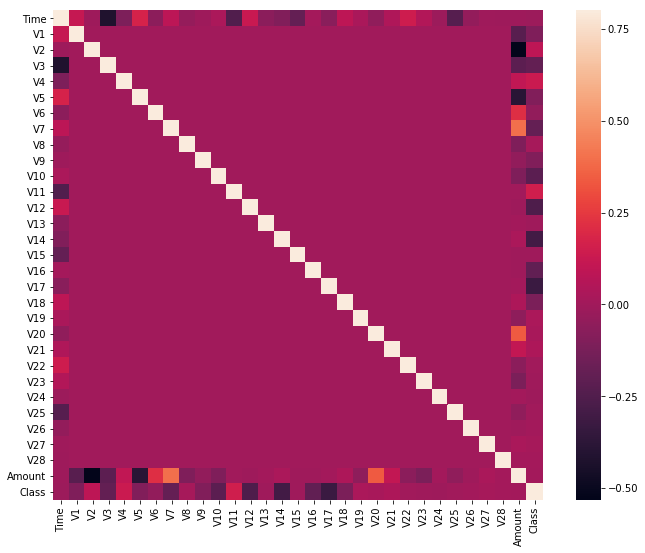

In [55]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
from sklearn.cross_validation import train_test_split

C:\Users\kingsumedh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [15]:
data_features = df[feature_names]
data_target = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
pred = model.predict(X_test)

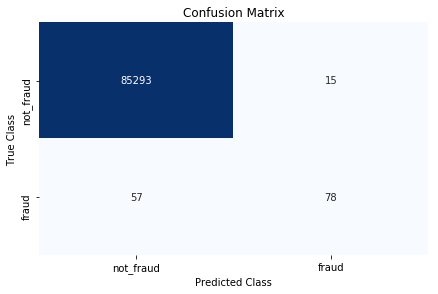

In [20]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [21]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.58
F1 Score for Logistic Regression Model 1 : 0.68


### Classification Trees

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                      columns=['NULL','LogisticReg', 'ClassTree', 'NaiveBayes'])

# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,85294,14,85308
default,40,95,135
Total,85334,109,85443


### Naive Bayes Classifier

In [66]:
# 1. Import the estimator object (model)
from sklearn.naive_bayes import GaussianNB

# 2. Create an instance of the estimator
NBC = GaussianNB()

# 3. Use the trainning data to train the estimator
NBC.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

C:\Users\kingsumedh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PREDICTION,pay,default,Total
TRUE,,,
pay,83522,1786,85308
default,28,107,135
Total,83550,1893,85443


## Unsupervised Machine Leraning to detect Fraud

Now that we have processed our data, we can begin deploying our machine learning algorithms.  We will use the following techniques: 

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a 
given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the 
object is with respect to the surrounding neighborhood.


**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting 
a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to 
isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees 
collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [58]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

0.0017304750013189597


In [61]:
# Fit the model
# Get all the columns from the dataFrame
columns = df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = df[columns]
Y = df[target]

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


C:\Users\kingsumedh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Isolation Forest: 697
0.9975527286899549
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.29      0.29      0.29       492

avg / total       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807



<Figure size 648x504 with 0 Axes>

## Deep Learning to detect Fraud

Here we are going to try something new and something different. Something NOBODY has ever tried.
Here we are going to make a Hybrid Deep Learning model to detect fraud. So what is this hybrid model? It is a model that is a combination of Unsupervised Deep Learning and Supervised Deep Learning. We will use the Self Organizing maps in the Unsupervised Deep Learning part and Artificial Neural Network in the Supervised Deep Learning part.

### Unsupervised Deep Learning: Self-Organizing Maps(SOM)

In [24]:
# Self Organizing Map

In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [28]:
dataset.tail(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
680,15790689,1,21.17,0.000,2,8,4,0.500,0,0,0,1,1,0,1,0
681,15665181,1,35.25,16.500,1,8,4,4.000,1,0,0,0,2,80,1,0
682,15633608,0,22.92,11.585,2,13,4,0.040,1,0,0,0,2,80,1350,1
683,15805261,0,48.17,1.335,2,3,7,0.335,0,0,0,0,2,0,121,0
684,15740356,1,43.00,0.290,1,13,8,1.750,1,1,8,0,2,100,376,1
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


In [29]:
dataset.describe

<bound method NDFrame.describe of      CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5      15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6      15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7      15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8      15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9      15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   
10     15644446   1  33.50   1.750   2  14   8  4.500   1   1    4    1    2   
11    

In [30]:
dataset.info

<bound method DataFrame.info of      CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5      15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6      15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7      15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8      15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9      15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   
10     15644446   1  33.50   1.750   2  14   8  4.500   1   1    4    1    2   
11     1

In [31]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [33]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

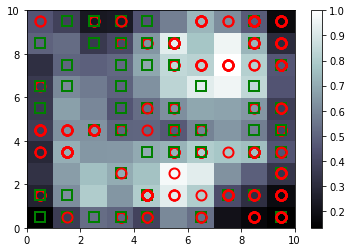

In [34]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [37]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5, 3)], mappings[(8, 3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [38]:
print(frauds)

[[1.5715750e+07 1.0000000e+00 2.0170000e+01 8.1700000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 1.9600000e+00 1.0000000e+00 1.0000000e+00
  1.4000000e+01 0.0000000e+00 2.0000000e+00 6.0000000e+01 1.5900000e+02]
 [1.5789201e+07 1.0000000e+00 1.8500000e+01 2.0000000e+00 2.0000000e+00
  3.0000000e+00 4.0000000e+00 1.5000000e+00 1.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 3.0100000e+02]
 [1.5761854e+07 1.0000000e+00 3.1250000e+01 2.8350000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.0000000e+00 0.0000000e+00 2.0000000e+00 1.7600000e+02 1.4700000e+02]
 [1.5725776e+07 1.0000000e+00 2.3080000e+01 0.0000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1000000e+01 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5704081e+07 1.0000000e+00 2.5170000e+01 3.5000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 6.2500000e-01 1.0000000e+00 1.

In [42]:
frauds[0]

array([1.571575e+07, 1.000000e+00, 2.017000e+01, 8.170000e+00,
       2.000000e+00, 6.000000e+00, 4.000000e+00, 1.960000e+00,
       1.000000e+00, 1.000000e+00, 1.400000e+01, 0.000000e+00,
       2.000000e+00, 6.000000e+01, 1.590000e+02])

In [43]:
frauds[-1]

array([1.5722535e+07, 1.0000000e+00, 2.3000000e+01, 7.5000000e-01,
       2.0000000e+00, 7.0000000e+00, 4.0000000e+00, 5.0000000e-01,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 3.2000000e+02, 1.0000000e+00])

### Unsupervised to Supervised Deep Learning - Now let's make the ANN!

In [44]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [46]:
# ANN starts here

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

C:\Users\kingsumedh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [47]:
# Initialising the ANN
classifier = Sequential()

In [48]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [49]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 20)

Epoch 1/20
690/690 [==============================] - 7s 10ms/step - loss: 0.5171 - acc: 0.9101
Epoch 2/20
690/690 [==============================] - 5s 7ms/step - loss: 0.2924 - acc: 0.9116
Epoch 3/20
690/690 [==============================] - 2s 2ms/step - loss: 0.2421 - acc: 0.9116
Epoch 4/20
690/690 [==============================] - 2s 2ms/step - loss: 0.2240 - acc: 0.9116
Epoch 5/20
690/690 [==============================] - 5s 7ms/step - loss: 0.2109 - acc: 0.9116
Epoch 6/20
690/690 [==============================] - 2s 2ms/step - loss: 0.2007 - acc: 0.9116
Epoch 7/20
690/690 [==============================] - 5s 7ms/step - loss: 0.1911 - acc: 0.9116
Epoch 8/20
690/690 [==============================] - 2s 2ms/step - loss: 0.1826 - acc: 0.9116
Epoch 9/20
690/690 [==============================] - 2s 2ms/step - loss: 0.1748 - acc: 0.9116
Epoch 10/20
690/690 [==============================] - 3s 5ms/step - loss: 0.1682 - acc: 0.9116
Epoch 11/20
690/690 [===========================

In [51]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [53]:
print(y_pred)

[[1.56444530e+07 4.96814057e-09]
 [1.57315860e+07 8.71821104e-09]
 [1.55756050e+07 1.44060133e-08]
 ...
 [1.56798010e+07 5.20086050e-01]
 [1.56326690e+07 5.20086050e-01]
 [1.56478980e+07 5.20086050e-01]]
